# MDEO model: DM scan with neutrino masses

The idea is to do a firts DM random scan

In [1]:
import numpy as np
import pandas as pd
import subprocess
import time
import sys

%matplotlib inline
import matplotlib.pyplot as plt 

In [2]:
import pyslha
import pyMDEO_LesHouches_generator

import neutrino_analytic
import NEUTRINO2018

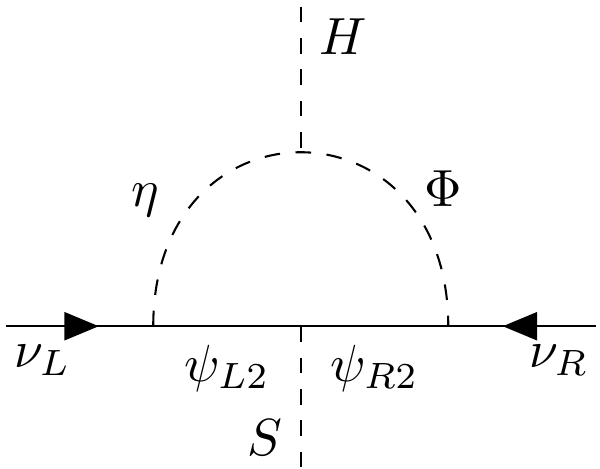

In [3]:
from IPython.display import Image
Image("/home/anferivera/Work/Documents_compartidos/MDEO/neutrino-diagram.png", width=300)

In [57]:
# Tiempo inicial
t1=time.time() 

x=[]

Num = 20

for i in range(0,Num):
    
    #Open the dicctionary
    xdict = pyMDEO_LesHouches_generator.buildSLHAinFile()

    #Random parameters
    g1=3.55690247E-01
    g1p = np.exp(np.random.uniform(np.log(10**(-3)),np.log(10**(0)))) #U1 coupling
    epsilon = np.exp(np.random.uniform(np.log(10**(-6)),np.log(10**(-2))))
    g1p1 = 0.
    g11p = -g1*epsilon
    MZp = np.exp(np.random.uniform(np.log(9.6e1),np.log(5.0e2))) 
    vX = MZp*(1.+epsilon**2)/(9.0*g1p)  #WARNING
    VEV = 246.220569
    
    theta = np.exp(np.random.uniform(np.log(1.0e-6),np.log(1.0e-3)))
    gamma = 1.0/np.sqrt(1.0+np.tan(2.0*theta)**2.0)
    
    mh1=125.1
    mh2= np.exp(np.random.uniform(np.log(1.0e3),np.log(5.0e3))) # WARNING
    Lam1=(0.5/VEV**2.0)*(mh1**2.0+mh2**2.0-gamma*(mh2**2.0-mh1**2.0))
    
    Lam2 = np.exp(np.random.uniform(np.log(10**(-4)),np.log(10**(0)))) #conj[Et].Et.conj[Et].Et
    Lam3 = np.exp(np.random.uniform(np.log(10**(-4)),np.log(10**(0)))) #conj[H].H.conj[Et].Et
    Lam4 = np.exp(np.random.uniform(np.log(10**(-4)),np.log(10**(0)))) #conj[H].Et.conj[Et].H
    Lam5 = (0.5/vX**2.0)*(mh1**2.0+mh2**2.0+gamma*(mh2**2.0-mh1**2.0)) ##conj[bi].bi.conj[bi].bi
    Lam6 = (0.5/(VEV*vX))*gamma*(mh2**2.0-mh1**2.0)*np.tan(2.0*theta) ##conj[bi].bi.conj[H].H
    Lam7 = np.exp(np.random.uniform(np.log(10**(-4)),np.log(10**(0)))) #conj[bi].bi.conj[Et].Et
    Lam8 = np.exp(np.random.uniform(np.log(10**(-4)),np.log(10**(0)))) ##conj[S].S.conj[S].S
    Lam9 = np.exp(np.random.uniform(np.log(10**(-4)),np.log(10**(0)))) #conj[S].S.conj[H].H
    Lam10 = np.exp(np.random.uniform(np.log(10**(-4)),np.log(10**(0)))) #conj[S].S.conj[bi].bi
    Lam11 = np.exp(np.random.uniform(np.log(10**(-4)),np.log(10**(0)))) ##conj[S].S.conj[Et].Et
    MS2 = np.exp(np.random.uniform(np.log(10**(6)),np.log(10**(8)))) #conj[S].S
    Mn2 = np.exp(np.random.uniform(np.log(10**(6)),np.log(10**(8)))) #mEt2 conj[Et].Et
    Yc = np.exp(np.random.uniform(np.log(10**(-4)),np.log(10**(0)))) # Yc bi.CL.CR
    muC = np.exp(np.random.uniform(np.log(10**(2)),np.log(2.*10**(3)))) #muC conj[H].Et.conj[S]

    xdict.blocks['MINPAR'].entries[1]='%.6E    # lambda1Input'%Lam1
    xdict.blocks['MINPAR'].entries[2]='%.6E    # lambda2Input'%Lam2
    xdict.blocks['MINPAR'].entries[3]='%.6E    # lambda3Input'%Lam3
    xdict.blocks['MINPAR'].entries[4]='%.6E    # lambda4Input'%Lam4
    xdict.blocks['MINPAR'].entries[5]='%.6E    # lambda5Input'%Lam5
    xdict.blocks['MINPAR'].entries[6]='%.6E    # lambda6Input'%Lam6
    xdict.blocks['MINPAR'].entries[7]='%.6E    # lambda7Input'%Lam7
    xdict.blocks['MINPAR'].entries[8]='%.6E    # lambda8Input'%Lam8
    xdict.blocks['MINPAR'].entries[9]='%.6E    # lambda9Input'%Lam9
    xdict.blocks['MINPAR'].entries[10]='%.6E    # lambda10Input'%Lam10
    xdict.blocks['MINPAR'].entries[11]='%.6E    # lambda11Input'%Lam11
    xdict.blocks['MINPAR'].entries[20]='%.6E    # g1pINPUT'%g1p
    xdict.blocks['MINPAR'].entries[21]='%.6E    # g1p1INPUT'%g1p1
    xdict.blocks['MINPAR'].entries[22]='%.6E    # g11pINPUT'%g11p
    xdict.blocks['MINPAR'].entries[23]='%.6E    # mEt2Input'%Mn2
    xdict.blocks['MINPAR'].entries[24]='%.6E    # MS2Input'%MS2
    xdict.blocks['MINPAR'].entries[30]='%.6E    # vXinput'%vX
    xdict.blocks['MINPAR'].entries[31]='%.6E    # Ycinput'%Yc
    xdict.blocks['MINPAR'].entries[32]='%.6E    # muCinput'%muC
    
    mChi = Yc*vX/np.sqrt(2.)
    
    '''if mChi < MZp:
        continue'''
    
    MX1 = mChi+np.exp(np.random.uniform(np.log(1.0),np.log(1.0e3)))
    MX2 = MX1+np.exp(np.random.uniform(np.log(1.0),np.log(1.0e3)))
    thetaf = np.exp(np.random.uniform(np.log(1.0e-3),np.log(2.0*np.pi)))
    gammaf = 1.0/np.sqrt(1.0+np.tan(2.0*thetaf)**2.0)
    YX11 = np.sqrt(2.0)/vX*0.5*(MX1+MX2-gammaf*(MX2-MX1)) #Yx bi.FxL.FxR
    YX22 = np.sqrt(2.0)/vX*0.5*(MX1+MX2+gammaf*(MX2-MX1))
    YX12 = np.sqrt(2.0)/vX*0.5*gammaf*(MX2-MX1)*np.tan(2.0*thetaf)
    YX21 = YX12
    #print('MX1=',MX1,'MX2=',MX2)
    
    xdict.blocks['YXIN'].entries[1,1]='%.6E    # YX(1,1)'%YX11
    xdict.blocks['YXIN'].entries[1,2]='%.6E    # YX(1,2)'%YX12
    xdict.blocks['YXIN'].entries[2,1]='%.6E    # YX(2,1)'%YX21
    xdict.blocks['YXIN'].entries[2,2]='%.6E    # YX(2,2)'%YX22

    #Rotation matrices and Yukawas after inversion
    FMa = neutrino_analytic.MATFermionXi(YX11,YX12,YX21,YX22,vX)
    SMa = neutrino_analytic.MATSalarS0(Lam3,Lam4,Lam7,Lam9,Lam10,vX,VEV,muC,MS2,Mn2)
    YUKS = neutrino_analytic.Yukawas(NEUTRINO2018.nuexpvalues(),FMa,SMa)

    YnL11 = YUKS['YnL11']
    YnL12 = YUKS['YnL12']
    YnL13 = YUKS['YnL13']
    YnL21 = YUKS['YnL21']
    YnL22 = YUKS['YnL22']
    YnL23 = YUKS['YnL23']
    YnR11 = YUKS['YnR11']
    YnR12 = YUKS['YnR12']
    YnR13 = YUKS['YnR13']
    YnR21 = YUKS['YnR21']
    YnR22 = YUKS['YnR22']
    YnR23 = YUKS['YnR23']

    ZL11 = YUKS['ZL11']
    ZL12 = YUKS['ZL12']
    ZL21 = YUKS['ZL21']
    ZL22 = YUKS['ZL22']
    ZR11 = YUKS['ZR11']
    ZR12 = YUKS['ZR12']
    ZR21 = YUKS['ZR21']
    ZR22 = YUKS['ZR22']
    mXi_1 = YUKS['mXi_1']
    mXi_2 = YUKS['mXi_2']

    ZN11 = YUKS['ZN11']
    ZN12 = YUKS['ZN12']
    ZN21 = YUKS['ZN21']
    ZN22 = YUKS['ZN22']
    mns_1 = YUKS['mns_1']
    mns_2 = YUKS['mns_2']
    
    #No scalar DM
    if mns_1 < mChi or mns_1 < mXi_1:
        continue

    ##hdij->YnLij
    xdict.blocks['YNLIN'].entries[1,1]='%.6E    # YnL(1,1)'%YnL11
    xdict.blocks['YNLIN'].entries[1,2]='%.6E    # YnL(1,2)'%YnL12
    xdict.blocks['YNLIN'].entries[1,3]='%.6E    # YnL(1,3)'%YnL13
    xdict.blocks['YNLIN'].entries[2,1]='%.6E    # YnL(2,1)'%YnL21
    xdict.blocks['YNLIN'].entries[2,2]='%.6E    # YnL(2,2)'%YnL22
    xdict.blocks['YNLIN'].entries[2,3]='%.6E    # YnL(2,3)'%YnL23
    ##heij->YnRij
    xdict.blocks['YNRIN'].entries[1,1]='%.6E    # YnR(1,1)'%YnR11
    xdict.blocks['YNRIN'].entries[1,2]='%.6E    # YnR(1,2)'%YnR12
    xdict.blocks['YNRIN'].entries[1,3]='%.6E    # YnR(1,3)'%YnR13
    xdict.blocks['YNRIN'].entries[2,1]='%.6E    # YnR(2,1)'%YnR21
    xdict.blocks['YNRIN'].entries[2,2]='%.6E    # YnR(2,2)'%YnR22
    xdict.blocks['YNRIN'].entries[2,3]='%.6E    # YnR(2,3)'%YnR23

    #Write the Leshouches file
    pyslha.writeSLHAFile('LesHouches.in.MDEO_low',xdict)
    
    #print('before SPHENO')
    #run SPheno
    #spheno = subprocess.getoutput('~/Downloads/Tesis/Automatic_Submodules_MDEO/SPHENO/bin/SPhenoMDEO LesHouches.in.MDEO_low')
    spheno = subprocess.getoutput('../.././SPheno-4.0.5/bin/SPhenoMDEO LesHouches.in.MDEO_low')
    so = subprocess.getoutput('cat SPheno.spc.MDEO')
    
    T = eval(so.split('Block SPhenoLowEnergy #')[1].split()[4])
    S = eval(so.split('Block SPhenoLowEnergy #')[1].split()[10])
    U = eval(so.split('Block SPhenoLowEnergy #')[1].split()[16])
    g2mu = eval(so.split('Block SPhenoLowEnergy #')[1].split()[26])
    TWpSPheno = eval(so.split('Block ANGLES Q')[1].split()[6])
    MZpSPheno = eval(so.split('# VWm')[1].split()[1])
    ZpDecaySPHENO = eval(so.split('DECAY        31')[1].split()[0])
    gBY = eval(so.split('Block GAUGE Q=')[1].split()[9])
    gBL = eval(so.split('Block GAUGE Q=')[1].split()[21])
    
    #print('before micromegas')    
    #run micromegas.
    #mo = subprocess.getoutput('~/Downloads/Tesis/Automatic_Submodules_MDEO/micromegas/MDEO/CalcOmega_with_DI_Detection') #with_direct_detection
    mo = subprocess.getoutput('~/Work/micromegas_5.0.6/MDEO/./CalcOmega_with_DI_Detection')#with_direct_detection
    
    if len(mo.split()) == 2:
        continue
    
    Omega1 = eval(mo.split('Omega_1h^2=')[1].split()[0])
    Omega2 = eval(mo.split('Omega_2h^2=')[1].split()[0])
    #print("i=",i,"Omega1=",Omega1,"Omega2=",Omega2)
    
    '''if Omega1+Omega2 > 0.1236:
        continue'''
    
    SIN1= eval(mo.split('CDM1-nucleon cross sections[pb]:')[1].split()[7])
    SIN2= eval(mo.split('CDM2-nucleon cross sections[pb]:')[1].split()[7])
    sv = eval(mo.split('CDM2-nucleon cross sections[pb]:')[1].split()[7])
    
    x.append([Lam1,Lam2,Lam3,Lam4,Lam5,Lam6,Lam7,Lam8,Lam9,Lam10,Lam11,MS2,Mn2,vX,Yc,muC,g1p,epsilon,\
              ZL11,ZL12,ZL21,ZL22,ZR11,ZR12,ZR21,ZR22,\
          ZN11,ZN12,ZN21,ZN22,mXi_1,mXi_2,mns_1,mns_2,YnL11,YnL12,YnL13,YnL21,YnL22,YnL23,\
          YnR11,YnR12,YnR13,YnR21,YnR22,YnR23,Omega1,Omega2,SIN1,SIN2,sv,MZp,mh1,mh2,theta,thetaf,T,S,U,\
              g2mu,mChi,TWpSPheno,MZpSPheno,ZpDecaySPHENO,gBY,gBL])

x=np.asarray(x)

xd=pd.DataFrame(x,columns=['Lam1','Lam2','Lam3','Lam4','Lam5','Lam6','Lam7','Lam8','Lam9',\
                           'Lam10','Lam11','MS2','Mn2','vX','Yc','muC','g1p','epsilon',\
                           'ZL11','ZL12','ZL21','ZL22','ZR11','ZR12','ZR21','ZR22','ZN11',\
                           'ZN12','ZN21','ZN22','mXi_1','mXi_2','mns_1','mns_2','YnL11',\
                           'YnL12','YnL13','YnL21','YnL22','YnL23','YnR11','YnR12','YnR13',\
                           'YnR21','YnR22','YnR23','Omega1','Omega2','SIN1','SIN2','sv',\
                           'MZp','mh1','mh2','theta','thetaf','T','S','U','g2mu','mChi',\
                           'TWpSPheno','MZpSPheno','ZpDecaySPHENO','gBY','gBL'])

t2=time.time() 
print ("The program spent", t2-t1, "s running",Num,"times")   

The program spent 79.32779264450073 s running 20 times


In [58]:
xd[:3]

,Lam1,Lam2,Lam3,Lam4,Lam5,Lam6,Lam7,Lam8,Lam9,Lam10,...,T,S,U,g2mu,mChi,TWpSPheno,MZpSPheno,ZpDecaySPHENO,gBY,gBL
0,0.258146,0.001337,0.246283,0.253036,251.773848,0.000273,0.257772,0.010453,0.325053,0.000159,...,1.120701e-05,8.125554e-06,3.796124e-07,2.153965e-14,0.057630,0.0,437.083809,774.239630,-0.000005,0.524896
1,0.258146,0.003704,0.315118,0.474823,0.326206,0.000015,0.002412,0.942620,0.026830,0.239346,...,3.677855e-05,1.436861e-05,3.644490e-07,2.762636e-15,885.112926,0.0,181.026137,0.005960,-0.000011,0.003196
2,0.258146,0.003898,0.032812,0.002191,1.000064,0.000254,0.059409,0.007005,0.000128,0.000416,...,1.269305e-09,1.569455e-07,1.078874e-06,1.913063e-14,13.301953,0.0,123.979309,0.010585,-0.000002,0.004784


In [21]:
'''g1 = eval(so.split('Block GAUGE Q=')[1].split()[5])
gBY = eval(so.split('Block GAUGE Q=')[1].split()[9])
gBL = eval(so.split('Block GAUGE Q=')[1].split()[21])
MZp = eval(so.split('# VWm')[1].split()[1])
ZpDecaySPHENO = eval(so.split('DECAY        31')[1].split()[0])'''
##ZpDecay = MZp*(gBY**2+324*gBL**2)/(32*np.pi)

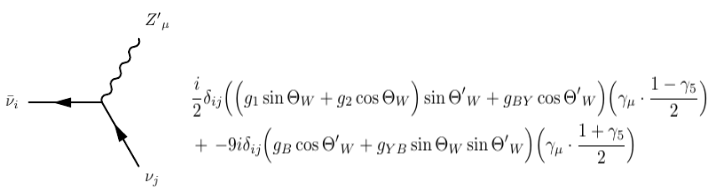

In [7]:
from IPython.display import Image
Image("/home/anferivera/Work/Documents_compartidos/MDEO/Zp-to-nunu.png", width=700)

\begin{align}
\Gamma (Z'\to \nu_i\nu_i) = 3 * \dfrac{\cos(\theta_{W'})^2 M_{Z'}(g_1^2\epsilon^2 +4 Q_{\nu R}^2 g'^2)}{64\pi}
\end{align}

$Q_{\nu R}=9$

In [60]:
xd['ZpDecay'] = 3*np.cos(xd.TWpSPheno)**2*xd.MZp*(xd.gBY**2+324*xd.gBL**2)/(64*np.pi)

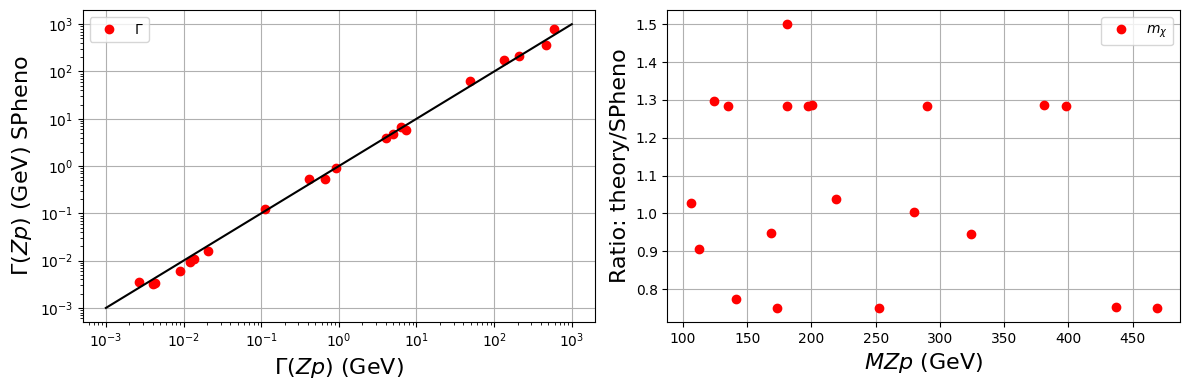

In [68]:
plt.figure(figsize=(12,4))

plt.subplot(121)
plt.loglog( xd.ZpDecay,xd.ZpDecaySPHENO,'ro',label='$\Gamma$')

a = np.linspace(1e-3,1e+3,5)
plt.plot(a,a,'k-')

plt.xlabel(r'$\Gamma(Zp)$ (GeV)',size=16)
plt.ylabel(r'$\Gamma(Zp)$ (GeV) SPheno',size=16)
plt.legend()
plt.grid()

plt.subplot(122)
plt.plot(xd.MZpSPheno, xd.ZpDecay/xd.ZpDecaySPHENO,'ro',label='$m_\chi$')

plt.xlabel(r'$MZp$ (GeV)',size=16)
plt.ylabel(r'Ratio: theory/SPheno',size=16)
plt.legend()
plt.grid()

plt.tight_layout()